## Simple 2d interpolation from one regular longitude, latitude grid to another

In [1]:
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.interpolate import interp2d

import os, sys
sys.path.append("/home/pangeo/py_packages")
from ingrid.times import to_pandas
from myplots.cplot import my_contourf

ds = xr.open_dataset('/net/kage/d5/datasets/GPCP/precip.mon.mean.nc')

In [15]:
from numba import stencil
import numpy as np

@stencil
def kernel1(a):
    return 0.25 * (a[0, 1] + a[1, 0] + a[0, -1] + a[-1, 0])

@stencil
def kernel2(a):
    return (a[-1, 1]  + 2*a[0, 1]  +   a[1, 1] + 
         2* a[-1, 0]  + 4*a[0, 0]  + 2*a[1, 0] +
            a[-1, -1] + 2*a[0, -1] +   a[1, -1] )/16.0

var = kernel1(ds.precip[0].values)
var2 = kernel2(ds.precip[0].values)

ds['sm'] = (['lat','lon'],var)
ds['sm'].attrs ={'units':'mm/day'}

ds['sm2'] = (['lat','lon'],var2)
ds['sm2'].attrs ={'units':'mm/day'}

# DOES NOT KNOW ABOUT PERIODIC BOUNDARIES

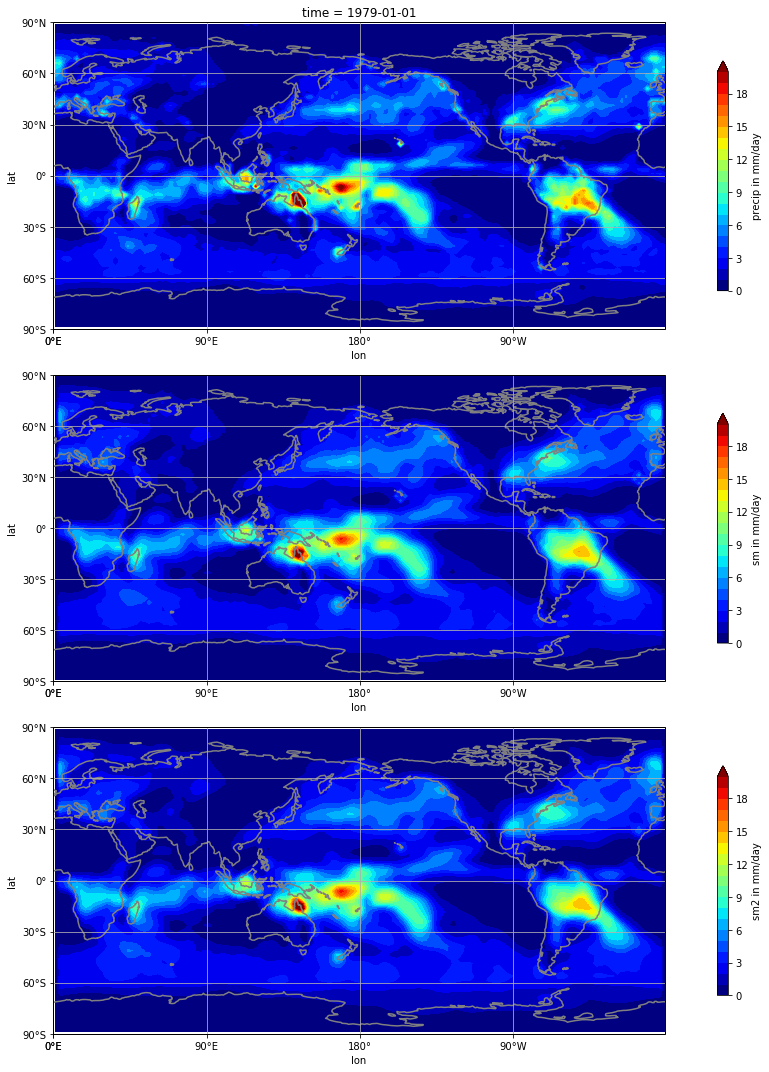

In [14]:
plt.figure(figsize=(15,15))
my_contourf(ds.precip[0], subplot=311, vmin = 0, vmax=20, levels = 21, grid=True)
my_contourf(ds.sm, subplot=312, vmin = 0, vmax=20, levels = 21, grid=True)
my_contourf(ds.sm2, subplot=313, vmin = 0, vmax=20, levels = 21, grid=True)
plt.tight_layout()